In [17]:
import matplotlib 
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np 

In [18]:
import pandas as pd
url = "data/nhanes_2015_2016.csv"
da = pd.read_csv(url)

# Studying Discrete Values 

In [19]:
gender = da['RIAGENDR']
gender.value_counts()

RIAGENDR
2    2976
1    2759
Name: count, dtype: int64

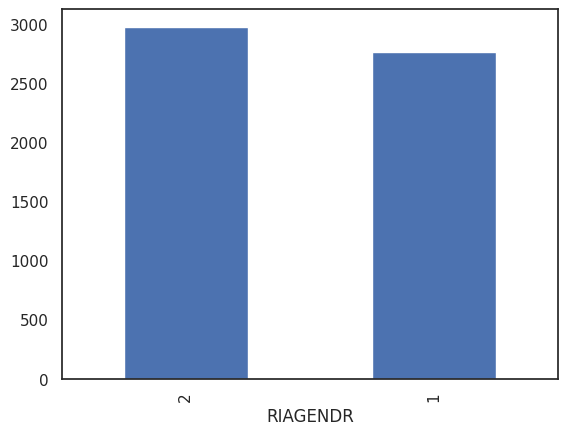

In [20]:
gender.value_counts().plot(kind='bar')
plt.show()

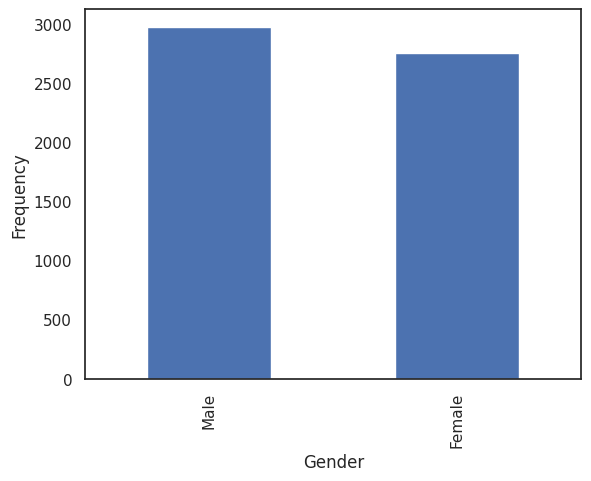

In [21]:
gender.value_counts().plot(kind='bar')
plt.xticks([0, 1], ['Male', 'Female'])
plt.xlabel("Gender")
plt.ylabel("Frequency")
plt.show()

### Most Common Value

In [22]:
sizes = np.array([22, 23, 29, 32, 39, 42, 42, 42, 42, 42, 42, 42, 42, 43, 44, 46, 51, 51, 55, 55, 57, 58, 78, 83, 97, 97])

In [23]:
sizes.mean()

np.float64(49.84615384615385)

In [24]:
from collections import Counter 
cnt = Counter()

for size in sizes: 
    cnt[size] += 1 
    
cnt.most_common()         # index 0 is the most common i.e. the mode 

[(np.int64(42), 8),
 (np.int64(51), 2),
 (np.int64(55), 2),
 (np.int64(97), 2),
 (np.int64(22), 1),
 (np.int64(23), 1),
 (np.int64(29), 1),
 (np.int64(32), 1),
 (np.int64(39), 1),
 (np.int64(43), 1),
 (np.int64(44), 1),
 (np.int64(46), 1),
 (np.int64(57), 1),
 (np.int64(58), 1),
 (np.int64(78), 1),
 (np.int64(83), 1)]

Alternative method: use the scipy library 

In [25]:
!pip install scipy

In [26]:
from scipy import stats
stats.mode(sizes)    # index 0 has value, index 1 has count 

ModeResult(mode=np.int64(42), count=np.int64(8))

In [27]:
gender.mode()   # not too useful since we could have got that from the bar chart anyway

0    2
Name: RIAGENDR, dtype: int64

In [28]:
stats.mode(gender) 

ModeResult(mode=np.int64(2), count=np.int64(2976))

### More than One "Classes "

In [29]:
da['HIQ210'].unique()

array([ 2., nan,  1.,  9.])

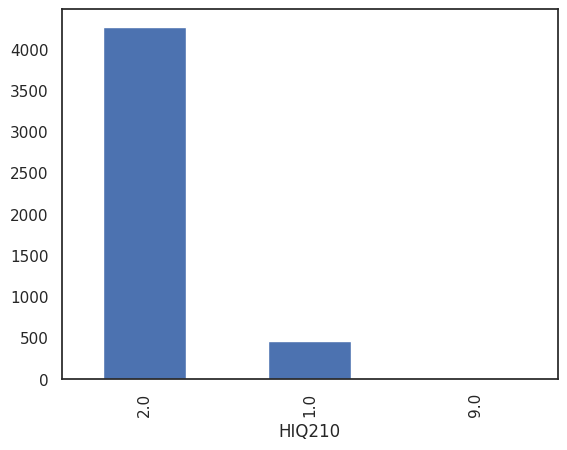

In [30]:
da['HIQ210'].value_counts().plot(kind='bar')
plt.show()

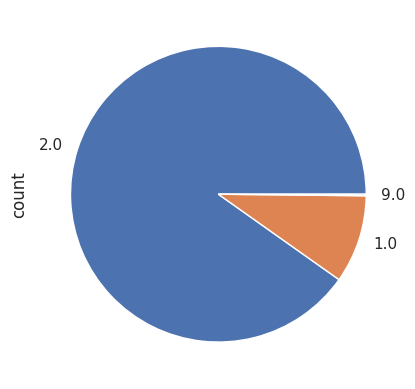

In [31]:
da['HIQ210'].value_counts().plot(kind='pie')  # highly NOT recommended! 
plt.show()

# Studying Real-Valued Numbers 

In [32]:
wt = da['BMXWT']

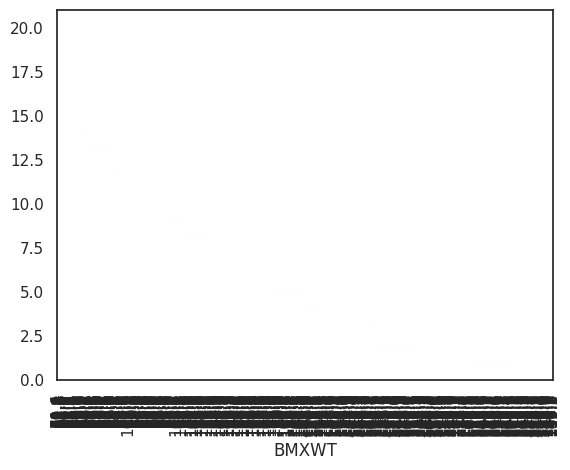

In [33]:
wt.value_counts().plot(kind='bar')    # this does not work at all 
plt.show()

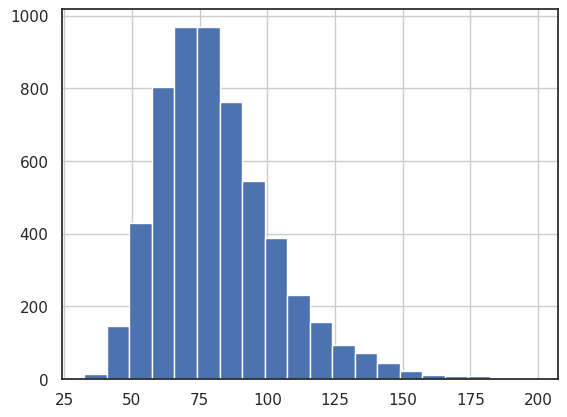

In [34]:
wt.hist(bins=20)
plt.show()

### Custom Matplotlib Histogram 

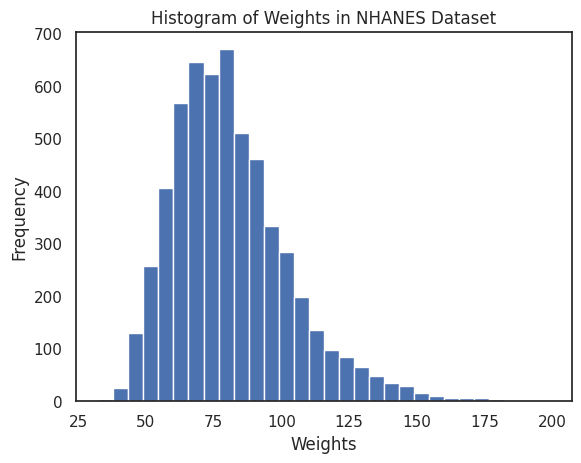

In [35]:
plt.hist(wt, bins=30) 
plt.ylabel('Frequency')
plt.xlabel('Weights');
plt.title("Histogram of Weights in NHANES Dataset")
plt.show()

### Prettifying and Styling Matplotlib with Seaborn

In [36]:
!pip install seaborn

In [37]:
import seaborn as sns
sns.set(color_codes=True)
sns.set_style("white")     # See more styling options here: https://seaborn.pydata.org/tutorial/aesthetics.html

/tmp/ipykernel_4419/1663950307.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(wt, bins=20, kde=False )   #         # to get rid of the "trend line"


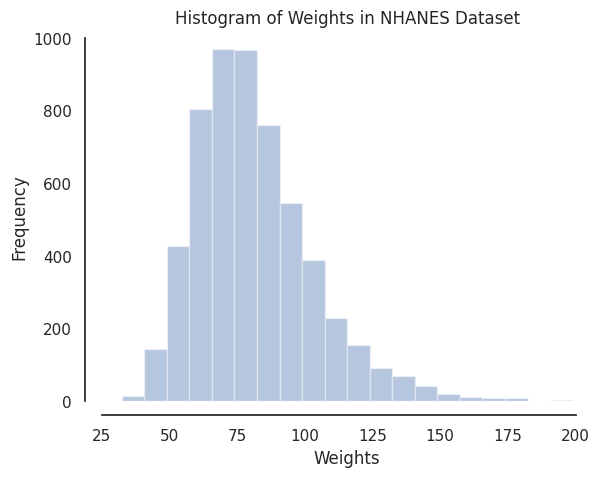

In [38]:
sns.distplot(wt, bins=20, kde=False )   #         # to get rid of the "trend line"
plt.ylabel('Frequency')
plt.xlabel('Weights');
plt.title("Histogram of Weights in NHANES Dataset")
sns.despine(offset=10, trim=True);  # move axes away 
plt.show()

See many more options about histograms with seaborn here: https://seaborn.pydata.org/tutorial/distributions.html

### Studying Central Tendency 

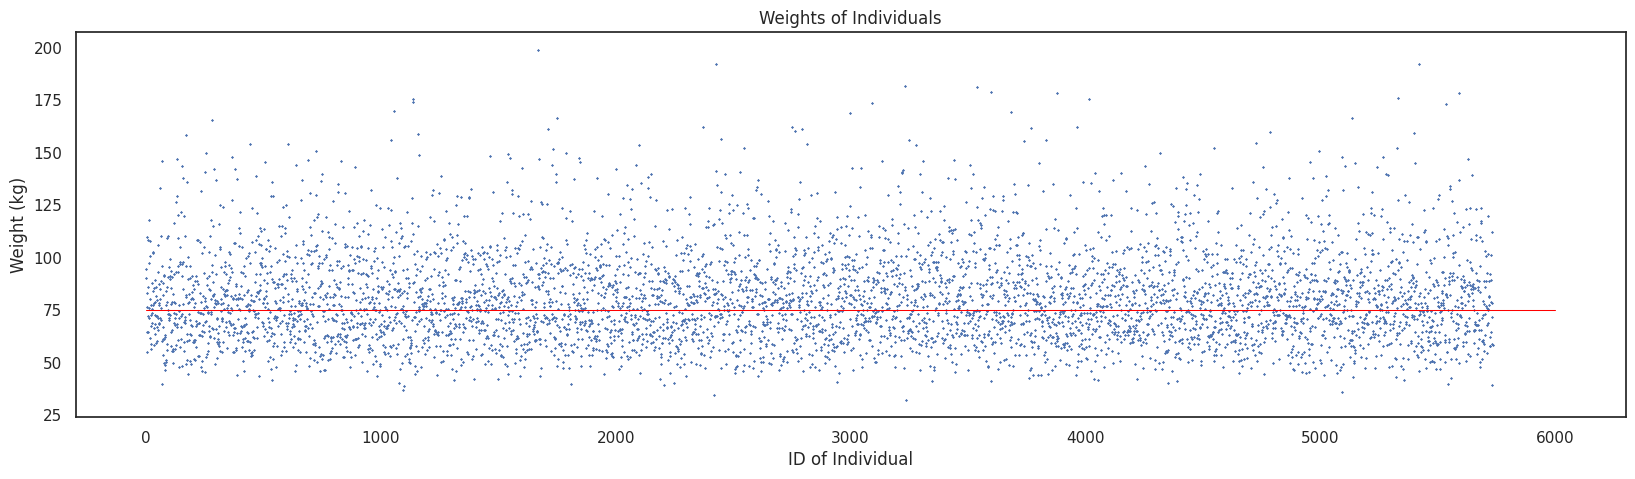

In [39]:
plt.figure(figsize=(20, 5)) 

x =  range(da['BMXWT'].size)
y =  da['BMXWT']

plt.scatter(x, y, marker='x', s=0.5)

plt.title("Weights of Individuals")
plt.xlabel("ID of Individual")
plt.ylabel("Weight (kg)")

# plot the estimate line 
p1 = (0, 75)
p2 = (6000, 75)
x_c, y_c = zip(p1, p2)
plt.plot(x_c, y_c, color='red', linewidth=0.75)
plt.show()

In [40]:
wt.mean() 

np.float64(81.34267560889516)

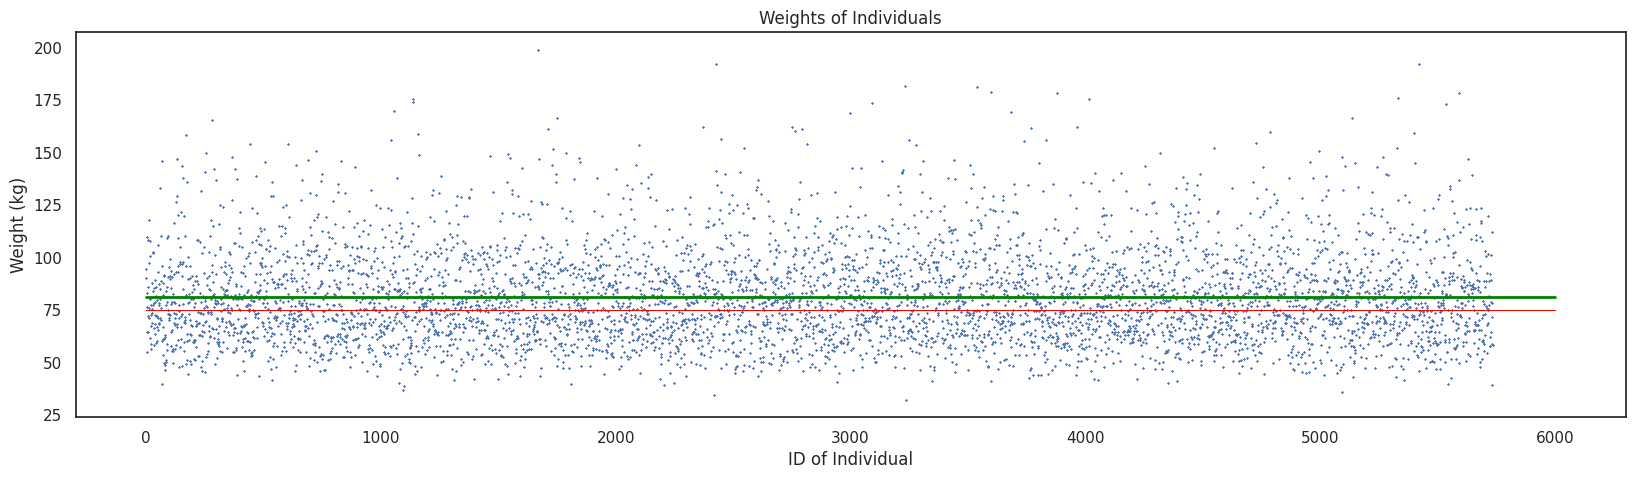

In [41]:
plt.figure(figsize=(20, 5)) 

x =  range(da['BMXWT'].size)
y =  da['BMXWT']

plt.scatter(x, y, marker='x', s=0.5)

plt.title("Weights of Individuals")
plt.xlabel("ID of Individual")
plt.ylabel("Weight (kg)")

# plot the estimate line 
x_c, y_c = ([0, 6000], [75, 75])
plt.plot(x_c, y_c, color='red', linewidth=0.75)

# plot the estimate line 
x_c, y_c = ([0, 6000], [wt.mean(), wt.mean()])
plt.plot(x_c, y_c, color='green', linewidth=2)

plt.show()

## Problem with Arithmetic Mean 

In [42]:
import numpy as np 

In [43]:
nums = np.array([3, 4, 9, 17, 18, 20, 22, 23, 29, 32, 39, 42, 42, 42, 51,97])

In [44]:
np.mean(nums)

np.float64(30.625)

In [45]:
# let's try to do a different kind of average: the median! 
np.median(nums)

np.float64(26.0)

## Visualizing Weights Data 
The problem with our weights data is similar. 

In [46]:
wt.max()

np.float64(198.9)

In [47]:
wt.min()

np.float64(32.4)

In [48]:
wt.median()

np.float64(78.2)

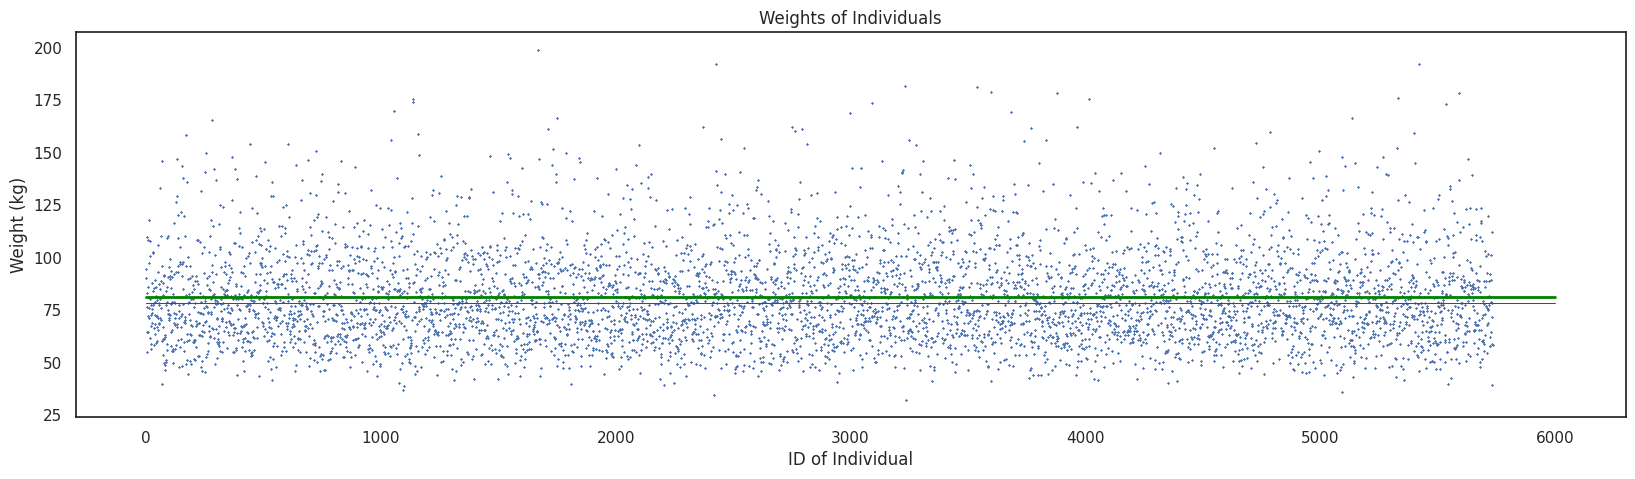

In [49]:
plt.figure(figsize=(20, 5)) 

x =  range(da['BMXWT'].size)
y =  da['BMXWT']

plt.scatter(x, y, marker='x', s=0.5)

plt.title("Weights of Individuals")
plt.xlabel("ID of Individual")
plt.ylabel("Weight (kg)")

# plot the estimate line 
x_c, y_c = ([0, 6000], [wt.median(), wt.median()])
plt.plot(x_c, y_c, color='red', linewidth=0.75)

# plot the estimate line 
x_c, y_c = ([0, 6000], [wt.mean(), wt.mean()])
plt.plot(x_c, y_c, color='green', linewidth=2)

plt.show()

### Quartiles and Boxplots 

In [50]:
nums = np.array([3, 4, 9, 17, 18, 20, 22, 23, 29, 32, 39, 42, 42, 42, 51, 97])

In [51]:
nums.mean()

np.float64(30.625)

In [52]:
np.median(nums)

np.float64(26.0)

In [53]:
import statistics 

In [54]:
statistics.quantiles(nums, n=4)

[np.float64(17.25), np.float64(26.0), np.float64(42.0)]

In [55]:
statistics.quantiles(wt, n=4)

[43.7, 50.8, 50.1]

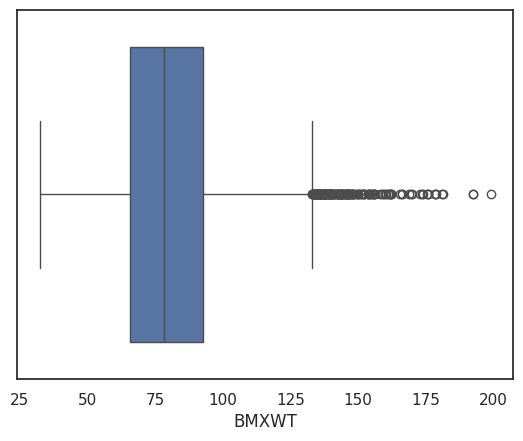

In [56]:
ax = sns.boxplot(x=wt)

In [61]:
male_wt = da.loc[da['RIAGENDR'] == 2, 'BMXWT']         
male_wt.mean()             # try .mean() 

np.float64(76.51676280963693)

In [62]:
female_wt = da.loc[da['RIAGENDR'] == 1, 'BMXWT']
female_wt.mean()

np.float64(86.57326222876058)

/tmp/ipykernel_4419/2257208498.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(  x = "RIAGENDR", y = "BMXWT",           data=da               , palette="Set3")


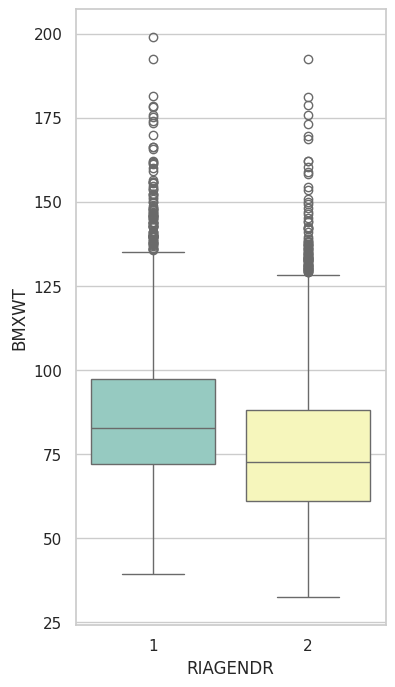

In [63]:
# But there's an easier way 
plt.figure(figsize=(4,8))
sns.set_style("whitegrid") 

ax = sns.boxplot(  x = "RIAGENDR", y = "BMXWT",           data=da               , palette="Set3")

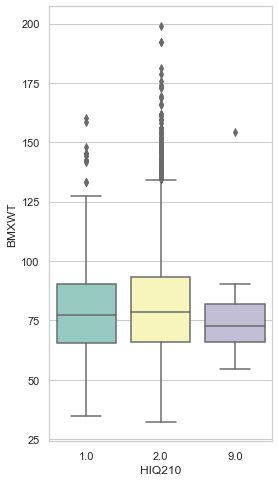

In [84]:
# But there's an easier way 
plt.figure(figsize=(4,8))
sns.set_style("whitegrid") 


ax = sns.boxplot(  x = "HIQ210", y = "BMXWT",           data=da               , palette="Set3")

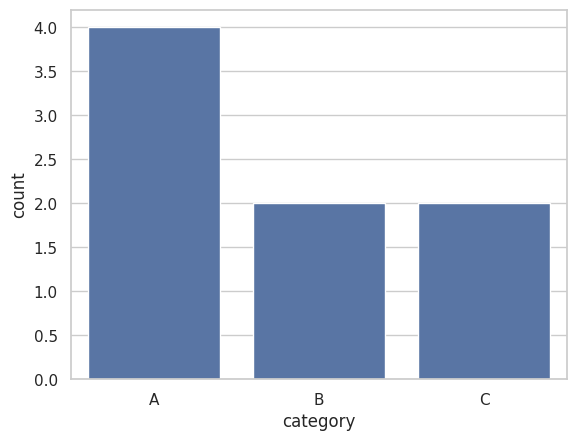

In [64]:
# Example data
data = {'category': ['A', 'B', 'A', 'C', 'B', 'A', 'A', 'C']}
df = pd.DataFrame(data)

# Create a countplot
sns.countplot(x='category', data=df)
plt.show()